*Probability* is 
>*How **likely** something is to happen.*

Let's start with obligatory example of coin-toss<br>
Here is our virtual coin so that everyone can see it:<br>
https://nipunsadvilkar.github.io/coin-flip/

In [22]:
HTML('<iframe src="https://nipunsadvilkar.github.io/coin-flip/" width="100%" height="700px" scrolling="no" style="margin-top: -70px;" frameborder="0"></iframe>')

Seems like it will take endless time click everyone and record it to prove as we increase n then probability of Heads is going to be: $$\frac{1}{2}$$ 
<br>and same for Tails.<br> Lets try with a different way - another virtual coin flipping and comparing it with theoretical probability of Heads and Tails $$\frac{1}{2}$$



In [4]:
from IPython.display import HTML
HTML('<iframe src="http://students.brown.edu/seeing-theory/basic-probability/index.html#first" width="100%" height="700px" scrolling="no" style="margin-top: -70px;" frameborder="0"></iframe>')

Still taking lot of time to get 0.5 probability. Lets try it with Python

In [12]:
%matplotlib inline
from utils import comp_prob_inference
import matplotlib.pyplot as plt
# import comp_prob_inference

In [13]:
comp_prob_inference.flip_fair_coin()

'tails'

In [14]:
flips = comp_prob_inference.flip_fair_coins(100)

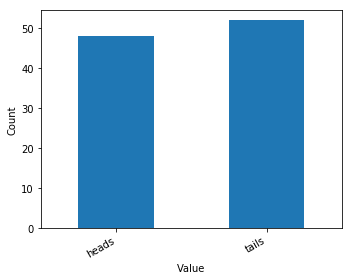

In [15]:
comp_prob_inference.plot_discrete_histogram(flips)

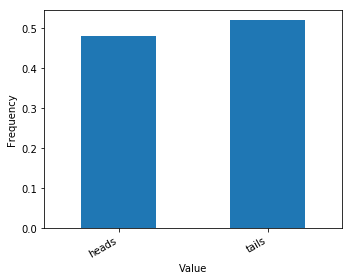

In [16]:
comp_prob_inference.plot_discrete_histogram(flips, frequency=True)

In [17]:
n = 100000
heads_so_far = 0
fraction_of_heads = []
for i in range(n):
    if comp_prob_inference.flip_fair_coin() == 'heads':
        heads_so_far += 1
    fraction_of_heads.append(heads_so_far / (i+1))

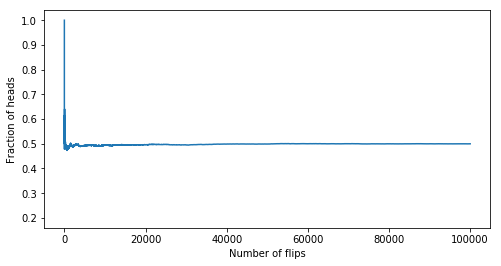

In [18]:
plt.figure(figsize=(8, 4))
plt.plot(range(1, n+1), fraction_of_heads)
plt.xlabel('Number of flips')
plt.ylabel('Fraction of heads')

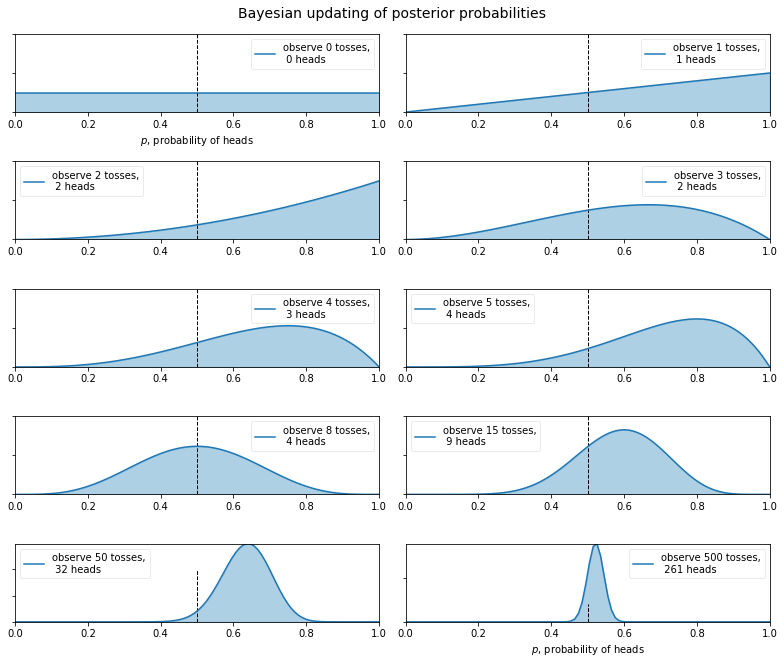

In [21]:
from IPython.core.pylabtools import figsize
import numpy as np
from matplotlib import pyplot as plt
figsize(11, 9)

import scipy.stats as stats

dist = stats.beta
n_trials = [0, 1, 2, 3, 4, 5, 8, 15, 50, 500]
data = stats.bernoulli.rvs(0.5, size=n_trials[-1])
x = np.linspace(0, 1, 100)

# For the already prepared, I'm using Binomial's conj. prior.
for k, N in enumerate(n_trials):
    sx = plt.subplot(len(n_trials)/2, 2, k+1)
    plt.xlabel("$p$, probability of heads") \
        if k in [0, len(n_trials)-1] else None
    plt.setp(sx.get_yticklabels(), visible=False)
    heads = data[:N].sum()
    y = dist.pdf(x, 1 + heads, 1 + N - heads)
    plt.plot(x, y, label="observe %d tosses,\n %d heads" % (N, heads))
    plt.fill_between(x, 0, y, color="#348ABD", alpha=0.4)
    plt.vlines(0.5, 0, 4, color="k", linestyles="--", lw=1)

    leg = plt.legend()
    leg.get_frame().set_alpha(0.4)
    plt.autoscale(tight=True)


plt.suptitle("Bayesian updating of posterior probabilities",
             y=1.02,
             fontsize=14)

plt.tight_layout()

## What does 0 and 1 actually mean?

<img src="media/probability-line.svg">

source: https://www.mathsisfun.com/data/probability.html